<a href="https://colab.research.google.com/github/bobo52310/Colab_Colaboratory/blob/main/BTC_sma89_sma89_slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

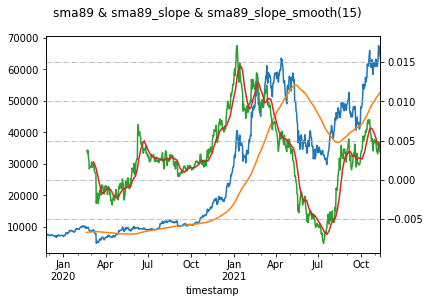

In [ ]:
from datetime import timezone
import datetime
import pandas as pd
import requests
import time
import datetime
from datetime import timezone
import matplotlib.pyplot as plt
myParams_only_symbol = {'symbol':'BTCUSDT'}

BTCUSDT_kline_4h_url = 'https://api.binance.com/api/v3/klines?interval=4h&limit=1500'
BTCUSDT_kline_1d_url = 'https://api.binance.com/api/v3/klines?interval=1d&limit=1000'

BTCUSDT_kline_4h = requests.get(BTCUSDT_kline_4h_url, params=myParams_only_symbol)
ohlcv_4h = pd.DataFrame(BTCUSDT_kline_4h.json(), columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
ohlcv_4h['timestamp'] = pd.to_datetime(ohlcv_4h['timestamp'], unit='ms', utc=1)

ohlcv_4h.set_index('timestamp', inplace=True)
ohlcv_4h = ohlcv_4h.astype(float)
#print(ohlcv_4h.index)

BTCUSDT_kline_1d = requests.get(BTCUSDT_kline_1d_url, params=myParams_only_symbol)
ohlcv_1d = pd.DataFrame(BTCUSDT_kline_1d.json(), columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
ohlcv_1d['timestamp'] = pd.to_datetime(ohlcv_1d['timestamp'], unit='ms', utc=1)

ohlcv_1d.set_index('timestamp', inplace=True)
ohlcv_1d = ohlcv_1d.astype(float)
#print(ohlcv_1d.index)

#sma89 strategy
close_sma89 = ohlcv_1d.close.tail(720)
sma3 = close_sma89.rolling(3).mean()
#sma20 = close_sma89.rolling(20).mean()
#sma60 = close_sma89.rolling(60).mean()
sma89 = close_sma89.rolling(89).mean()
sma89_slope = (sma89 - sma89.shift())/sma89
sma89_slope_smooth = sma89_slope.rolling(15).mean()

entries_sma89 = (sma3 > sma89 ) & (sma3.shift() < sma89.shift())
exits_sma89 = (sma3 < sma89 ) & (sma3.shift() > sma89.shift())


fig = plt.figure()
fig.suptitle("sma89 & sma89_slope & sma89_slope_smooth(15)")
close_sma89.plot()
sma89.plot()
sma89_slope.plot(secondary_y=True)
sma89_slope_smooth.plot(secondary_y=True)
plt.grid(axis='y',linestyle='-.')
#entries_sma89.astype(int).plot(secondary_y=True)
#(-exits_sma89.astype(int)).plot(secondary_y=True)